In [47]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#import dataset
data = pd.read_csv(r"D:\TheSmartBridge\Projects\New folder\Telecom churn modelling\Telecom churn modelling\data\DataSet.csv")

In [49]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
data['Churn'].value_counts()  # Data is imbalanced

No     5174
Yes    1869
Name: Churn, dtype: int64

In [51]:
data.drop(["customerID"], axis =1, inplace = True)

In [52]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [55]:
#checking for null values
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [56]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [57]:
data["TotalCharges"].fillna(data["TotalCharges"].median() , inplace =True)

In [58]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


<AxesSubplot:>

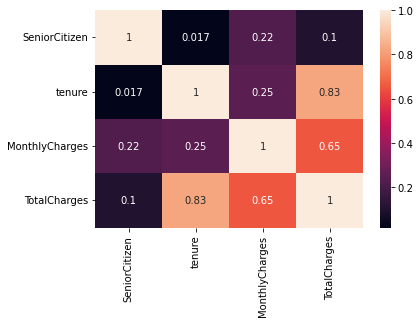

In [60]:
sns.heatmap(data.corr(), annot=True)

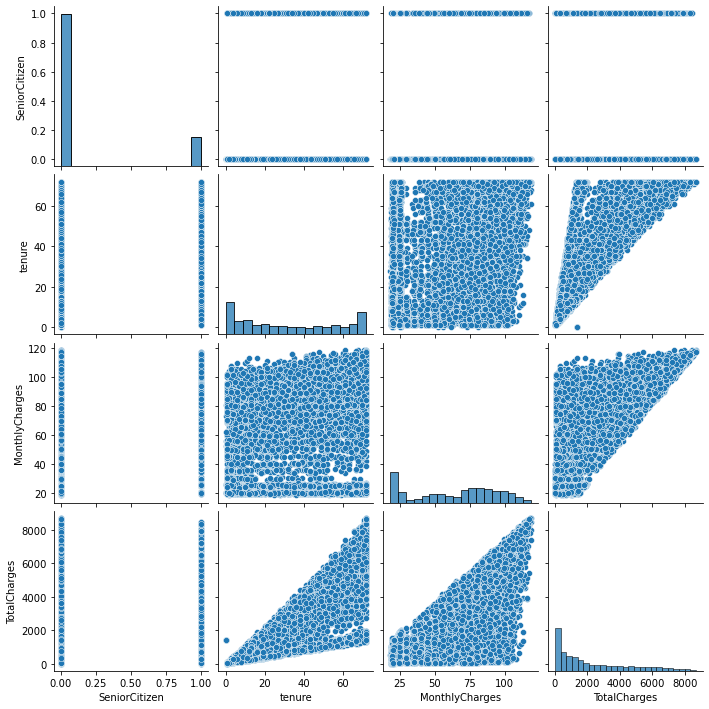

In [15]:
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

In [67]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [61]:
for i in data:
    print(data[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["Partner"] = le.fit_transform(data["Partner"])
data["Dependents"] = le.fit_transform(data["Dependents"])
data["PhoneService"] = le.fit_transform(data["PhoneService"])
data["MultipleLines"] = le.fit_transform(data["MultipleLines"])
data["InternetService"] = le.fit_transform(data["InternetService"])
data["OnlineSecurity"] = le.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"] = le.fit_transform(data["OnlineBackup"])
data["DeviceProtection"] = le.fit_transform(data["DeviceProtection"])
data["TechSupport"] = le.fit_transform(data["TechSupport"])
data["StreamingTV"] = le.fit_transform(data["StreamingTV"])
data["StreamingMovies"] = le.fit_transform(data["StreamingMovies"])
data["Contract"] = le.fit_transform(data["Contract"])
data["PaperlessBilling"] = le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"] = le.fit_transform(data["PaymentMethod"])
data["Churn"] = le.fit_transform(data["Churn"])

In [63]:
for i in data:
    print(data[i].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
[0 1]
[1 0 2]
[0 1 2]
[0 2 1]
[2 0 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 1 2]
[1 0]
[2 3 0 1]
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [70]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


<AxesSubplot:>

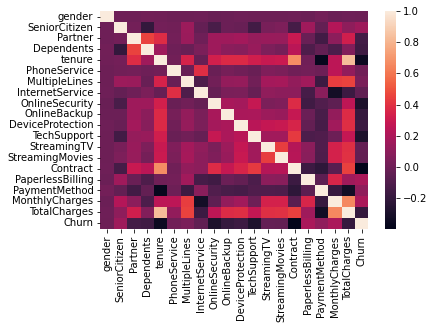

In [21]:
sns.heatmap(data.corr(), annot=False)

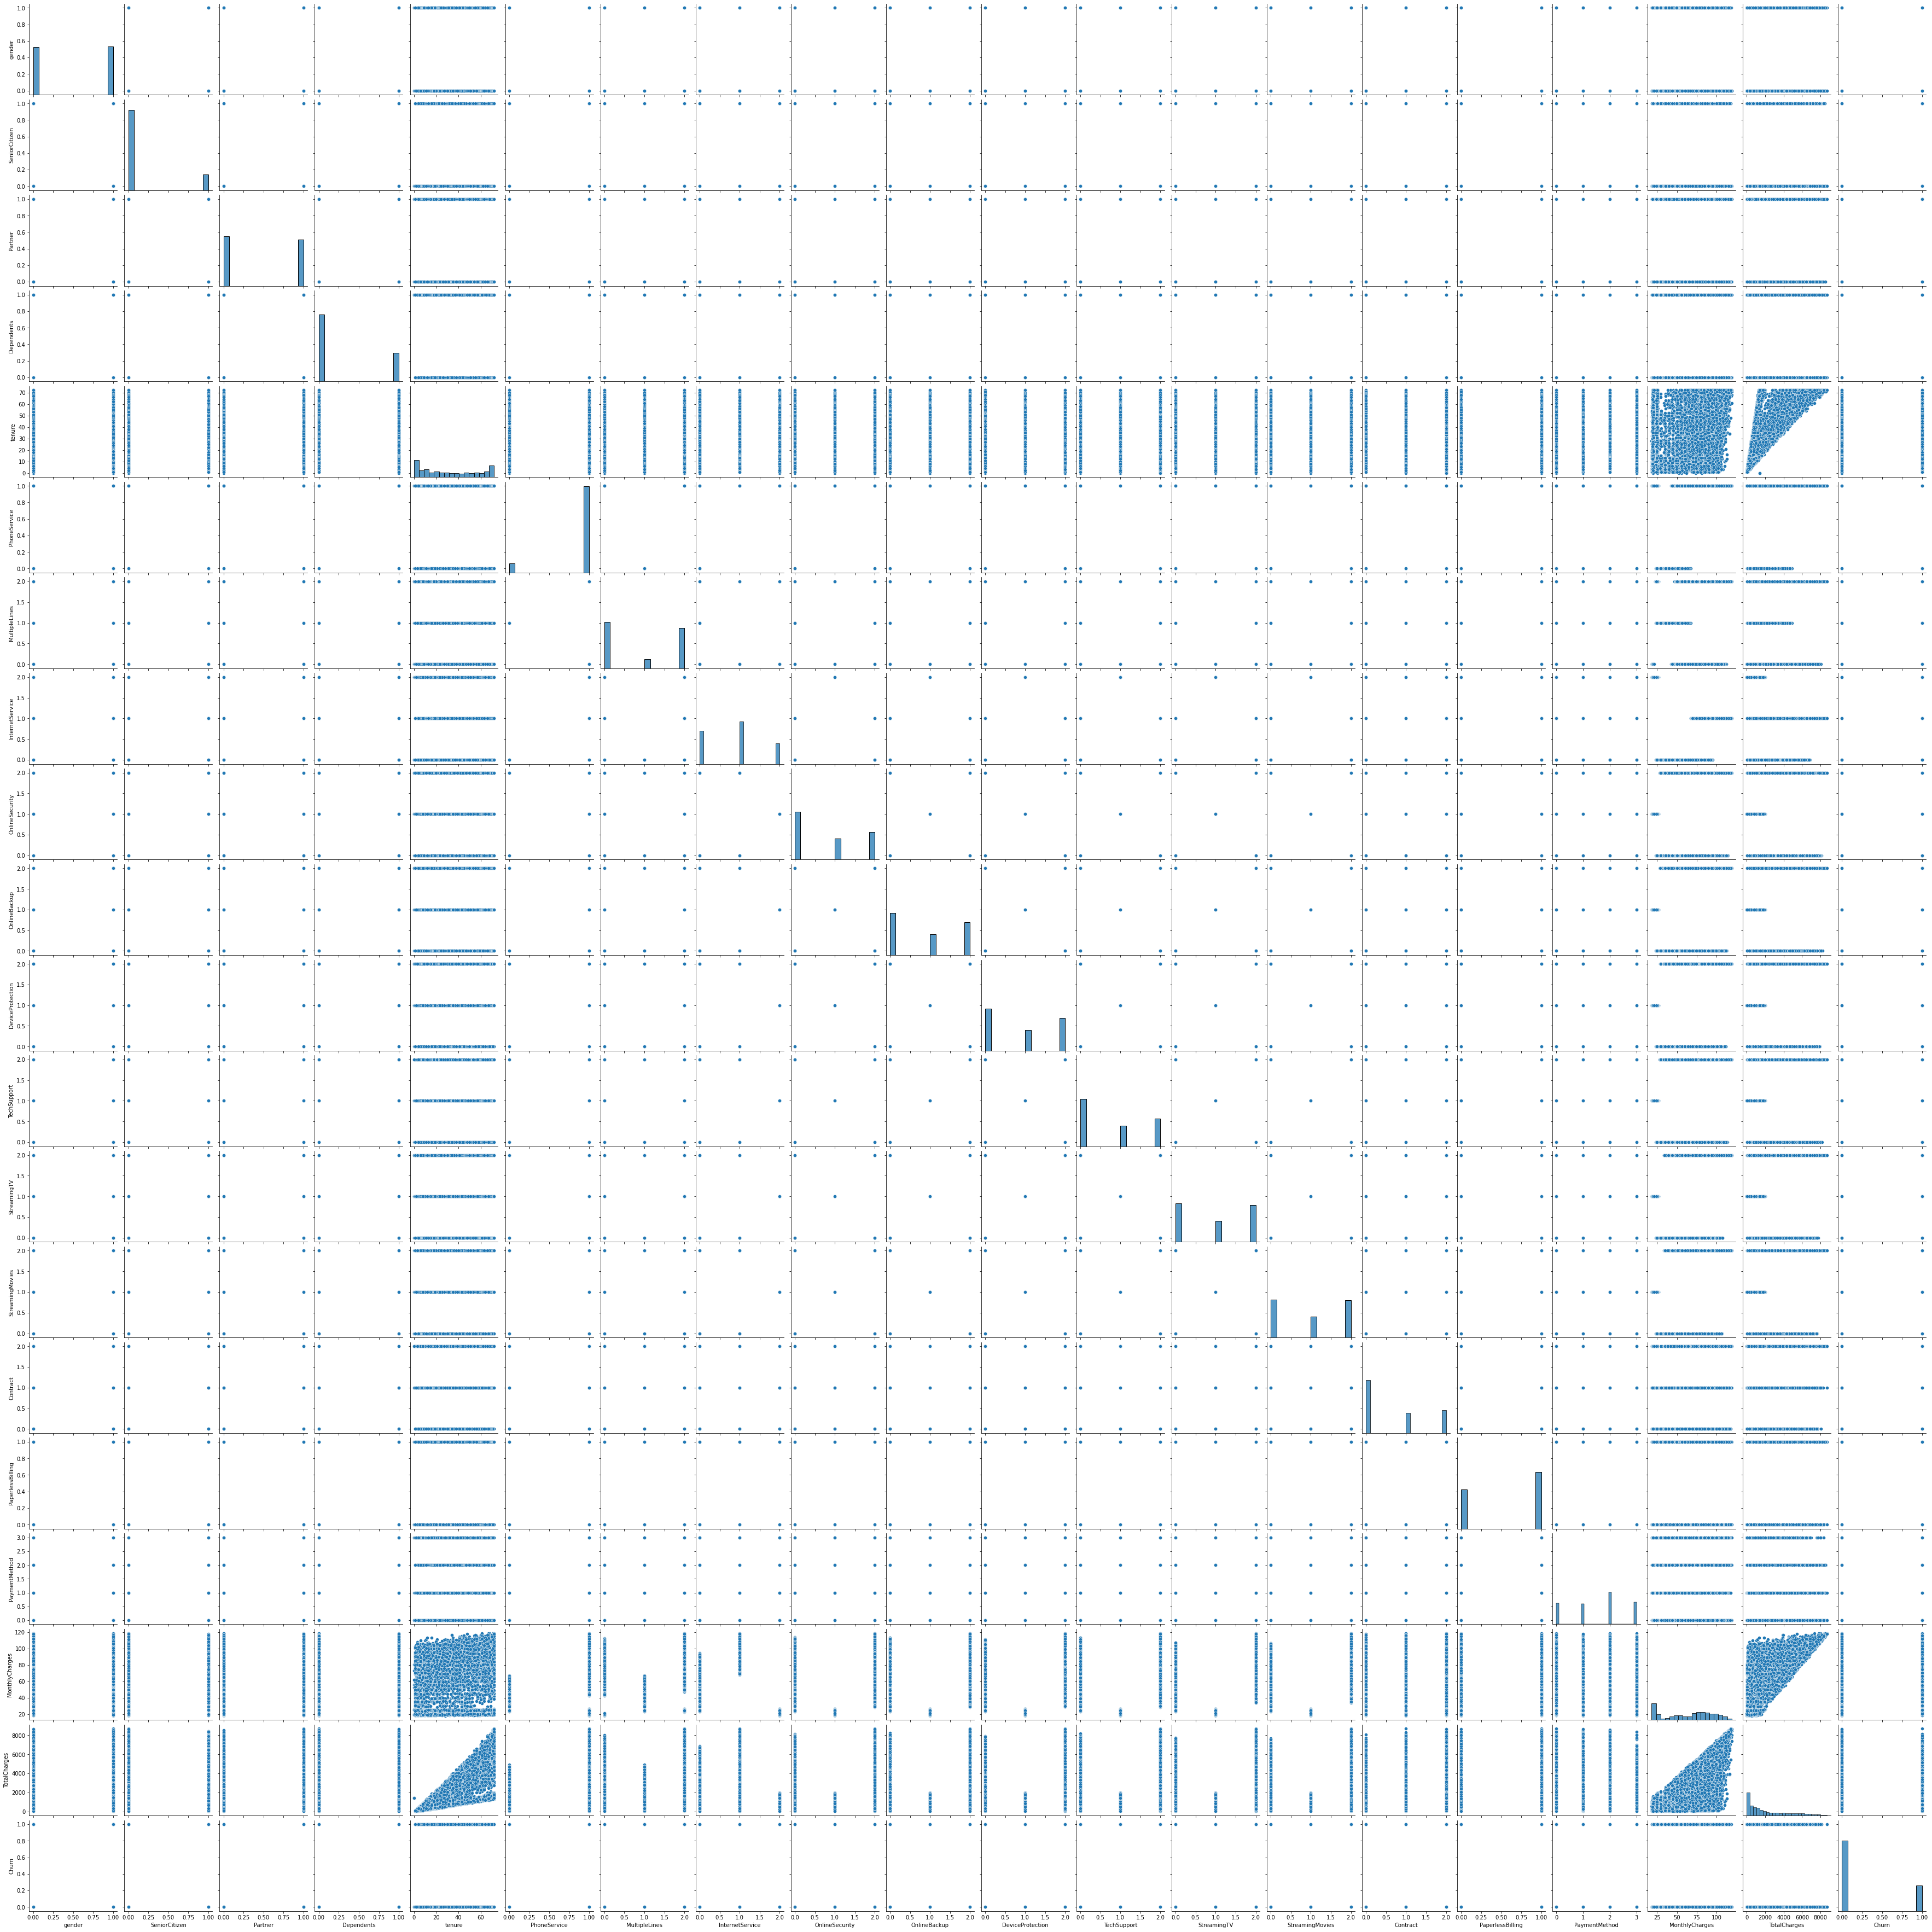

In [21]:
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

In [71]:
x= data.iloc[:,0:19].values
y= data.iloc[:,19:20].values

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smt = SMOTE()

x_resample, y_resample = smt.fit_resample(x,y)

In [74]:
x_resample

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 2.98500000e+01, 2.98500000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 5.69500000e+01, 1.88950000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 5.38500000e+01, 1.08150000e+02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 7.31471901e-01, ...,
        1.26852810e+00, 1.01697208e+02, 1.06652723e+03],
       [0.00000000e+00, 7.29501022e-01, 0.00000000e+00, ...,
        2.27049898e+00, 4.55918004e+01, 1.97715976e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.14751532e+00, 8.57499217e+01, 2.64394333e+02]])

In [75]:
y_resample

array([0, 0, 1, ..., 1, 1, 1])

In [76]:
x.shape, x_resample.shape

((7043, 19), (10348, 19))

In [77]:
y.shape, y_resample.shape

((7043, 1), (10348,))

from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x_resample[:,6:7]).toarray()
b= one.fit_transform(x_resample[:,7:8]).toarray()
c= one.fit_transform(x_resample[:,8:9]).toarray()
d= one.fit_transform(x_resample[:,9:10]).toarray()
e= one.fit_transform(x_resample[:,10:11]).toarray()
f= one.fit_transform(x_resample[:,11:12]).toarray()
g= one.fit_transform(x_resample[:,12:13]).toarray()
h= one.fit_transform(x_resample[:,13:14]).toarray()
i= one.fit_transform(x_resample[:,14:15]).toarray()
j= one.fit_transform(x_resample[:,16:17]).toarray()
x_resample=np.delete(x_resample,[6,7,8,9,10,11,12,13,14,16],axis=1)
x_resample=np.concatenate((a,b,c,d,e,f,g,h,i,j,x_resample),axis=1)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state = 0)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [82]:
lr_pred = lr.predict(x_test)

In [83]:
lr_pred

array([1, 0, 1, ..., 0, 0, 1])

In [84]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [85]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(lr_pred,y_test)

In [86]:
lr_acc

0.7758454106280194

In [87]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(lr_pred,y_test)

In [88]:
lr_cm

array([[764, 195],
       [269, 842]], dtype=int64)

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0,criterion = "entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [90]:
dtc_pred = dtc.predict(x_test)

In [91]:
dtc_pred

array([1, 0, 1, ..., 0, 0, 1])

In [92]:
dtc_acc = accuracy_score(dtc_pred,y_test)

In [93]:
dtc_acc

0.7893719806763285

In [94]:
dtc_cm = confusion_matrix(dtc_pred,y_test)

In [95]:
dtc_cm

array([[722, 125],
       [311, 912]], dtype=int64)

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators = 10, criterion = "entropy",random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [97]:
rfc_pred = rfc.predict(x_test)

In [98]:
rfc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [99]:
rfc_acc = accuracy_score(rfc_pred,y_test)

In [100]:
rfc_acc

0.8048309178743961

In [101]:
rfc_cm = confusion_matrix(rfc_pred,y_test)

In [102]:
rfc_cm

array([[708,  79],
       [325, 958]], dtype=int64)

In [103]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [104]:
svm_pred = svm.predict(x_test)

In [105]:
svm_pred

array([1, 0, 1, ..., 1, 0, 1])

In [106]:
svm_acc = accuracy_score(svm_pred,y_test)

In [107]:
svm_acc

0.7705314009661836

In [108]:
svm_cm = confusion_matrix(svm_pred,y_test)

In [109]:
svm_cm

array([[734, 176],
       [299, 861]], dtype=int64)

In [110]:
#svm_pred_own = svm.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))

In [111]:
#svm_pred_own

In [112]:
import pickle
pickle.dump(rfc,open("churn.pkl" , "wb"))